# Melbourne University AES/MathWorks/NIH Seizure Prediction

La epilepsia afecta a cerca del 1% de la población mundial y está caracterizada por la ocurrencia de convulsiones repentinas. Para la mayoría de los pacientes es suficiente proporcionarles una alta dosis de medicamentos anticonvulsivos para prevenir esta crisis, sin embargo por esta misma razón es que frecuentemente sufren de esfectos secundarios. Entre el 20 y 40 por ciento de los pacientes con epilepsia, los medicamentos no son efectivos.

Los sistemas de prediccción de convulsiones tienen el potencial de auxiliar a los pacientes con epilepsia a tener una mejor calidad de vida. En base a la actividad electrica del cerebro (EEG), un algoritmo efectivo debería de predecir con alto grado de probabilidad la ocurrencia de las convulsiones, por lo tanto se pueden diseñar dispositivos que adviertan al usuario y así evitar actividades peligrosas y administrar la dosis de medicamente adecuada.

![ ]("Seizure Prediction Grahic.png")

### Background

Existe nueva evidencia de que la actividad dinamica temporal del cerebro puede ser clasificada en 4 clases: Preictal, Interictal, Ictal y Post-ictal. Los sistemas de predicción deben de ser capaces de identificar un estado preictal que puede ser diferenciado de los demás estados, de esta manera se podría prevenir la convulsión. 

Actividad del cerebro humano fue guardada en la forma de EEG intracranial, lo que involucra electrodos posicionados en la superficie de la corteza cerebral capturando las señales electricas con un sistema de monitoreo.

### Dataset

Los datos están organizados en carpetas contenedoras de datos de entrenamiento y de pruebas por cada paciente. Para esta primera parte se selecciono la carpeta train_1 de datos de entrenammiento organizada en archivos nombrados de la siguiente manera.

i_j_k.mat - El j-ésimo segmento de datos correspondiente a la k clase (k = 0 para interictal, k = 1 para preictal) para el i-ésimo paciente.

Y dentro de este archivo .mat encontraremos lo siguiente: 

data: Una matriz de muestra de valores iEEG ordenada fila y columna como muestra y electrodo respectivamente.
nSamplesSegment: Número total de muestras (columnas).
iEEGsamplingRate: Tasa de muestreo de datos, es decir, el número de muestras de datos que representan 1 segundo de los EEG.
channelIndices: Un arreglo de índices correspondiente a las columnas en data.
sequence: El índice del segmento de datos dentro de la serie de una hora de clips.

![ ]("EEG.png")

### Limpieza de datos

El conjunto de datos brindado viene en carpetas contenedoras de archivos .mat, la siguiente función nos permite leer el archivo y asignarlo a un diccionario para poder estudiarlos. 

In [27]:
import sys
import os
import numpy as np
import pandas as pd
import random
import time
import math 
from scipy.io import loadmat
from scipy.spatial import distance
#np.set_printoptions(precision=2, suppress=True)

def mat_to_data(path):
    mat = loadmat(path)
    names = mat['dataStruct'].dtype.names
    ndata = {n: mat['dataStruct'][n][0, 0] for n in names}
    return ndata

Primeramente se imprimirá cada uno de los índices en el diccionario y así ver como viene distribuida la información.

In [28]:
feat = mat_to_data('train_1/1_10_1.mat')
feat2 = mat_to_data('train_1/1_10_0.mat')

print(feat['data'])
print(feat['nSamplesSegment'])
print(feat['iEEGsamplingRate'])
print(feat['channelIndices'])
print(feat['sequence'])

[[ 12.58   2.    13.6  ...,  19.87  -5.7  -11.59]
 [ 16.58   9.     6.6  ...,  16.87 -11.7   -7.59]
 [  9.58  16.     9.6  ...,  12.87  -9.7   -8.59]
 ..., 
 [ 10.58  42.    -5.4  ..., -12.13 -10.7    0.41]
 [  7.58  33.    -0.4  ..., -18.13 -13.7   -0.59]
 [  7.58  36.    -5.4  ..., -13.13  -7.7   -1.59]]
[[ 240000.]]
[[ 400.]]
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.  16.]]
[[ 4.]]


In [16]:
df = pd.DataFrame(data=feat['data'])
df2 = pd.DataFrame(data=feat2['data'])
#for column in df:
#    df.loc[df[column] == 0,column] = np.nan 
#for column in df2:
#    df2.loc[df2[column] == 0,column] = np.nan 

#print ('Contabilidad de valores nulos por columna')
#print (df.isnull().sum(), '\n')
#print (df2.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en etapa interictal')
for column in df:
        porcentaje = df[column].isnull().sum()/df.shape[0] * 100
        print(column," : ",porcentaje)
print ('Porcentaje de datos nulos en etapa preictal')
for column in df2:
        porcentaje = df2[column].isnull().sum()/df2.shape[0] * 100
        print(column," : ",porcentaje)

Porcentaje de datos nulos en etapa interictal
0  :  0.0
1  :  0.0
2  :  0.0
3  :  0.0
4  :  0.0
5  :  0.0
6  :  0.0
7  :  0.0
8  :  0.0
9  :  0.0
10  :  0.0
11  :  0.0
12  :  0.0
13  :  0.0
14  :  0.0
15  :  0.0
Porcentaje de datos nulos en etapa preictal
0  :  0.0
1  :  0.0
2  :  0.0
3  :  0.0
4  :  0.0
5  :  0.0
6  :  0.0
7  :  0.0
8  :  0.0
9  :  0.0
10  :  0.0
11  :  0.0
12  :  0.0
13  :  0.0
14  :  0.0
15  :  0.0


In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

(-300, 300)

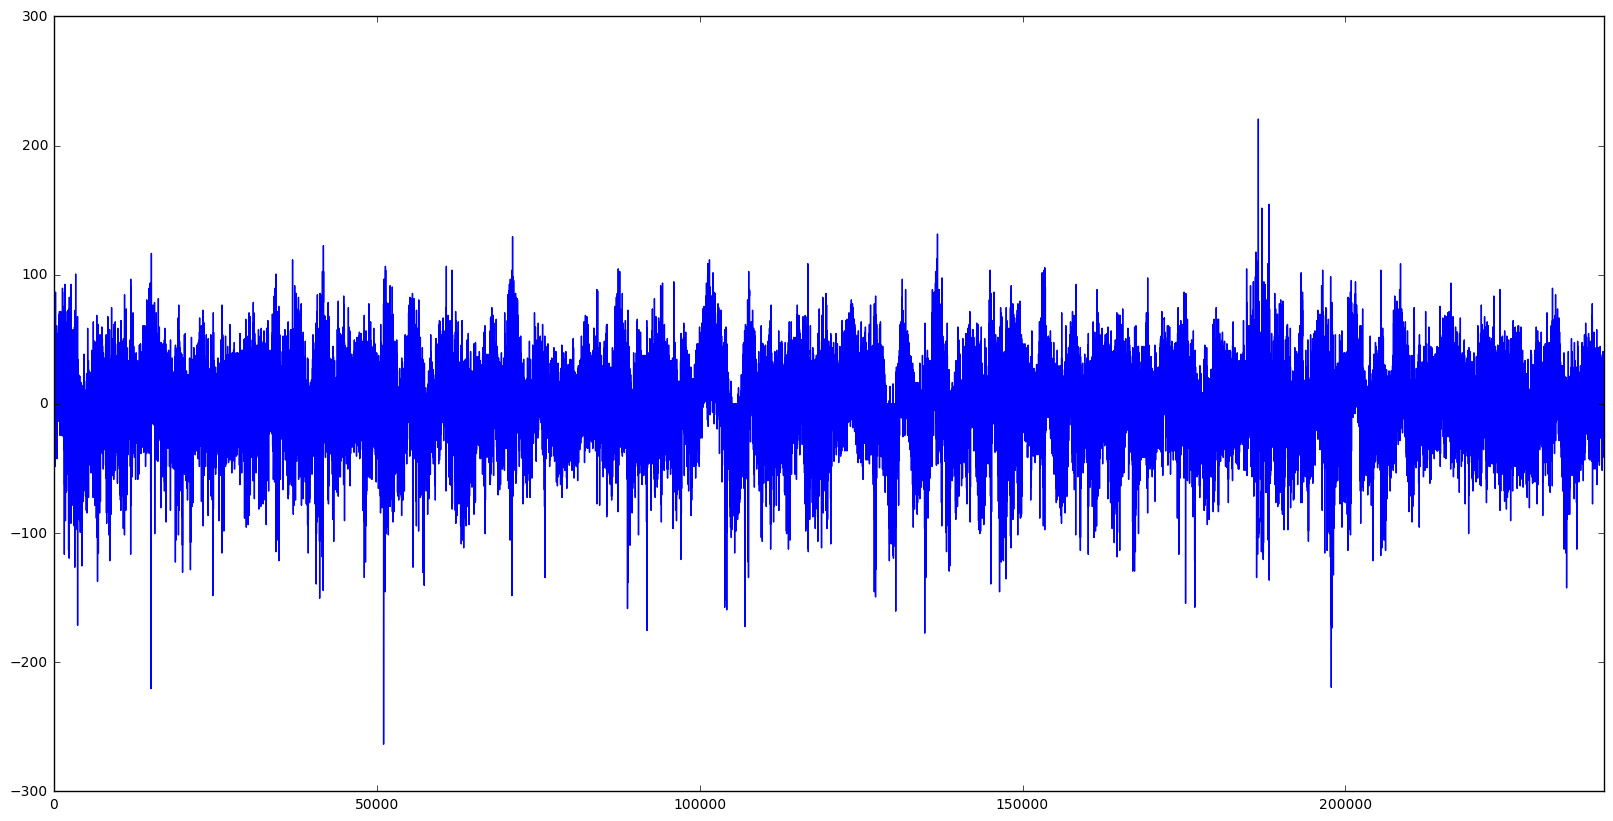

In [17]:
df[0].plot(figsize=(20,10)).set_ylim([-300, 300])

(-300, 300)

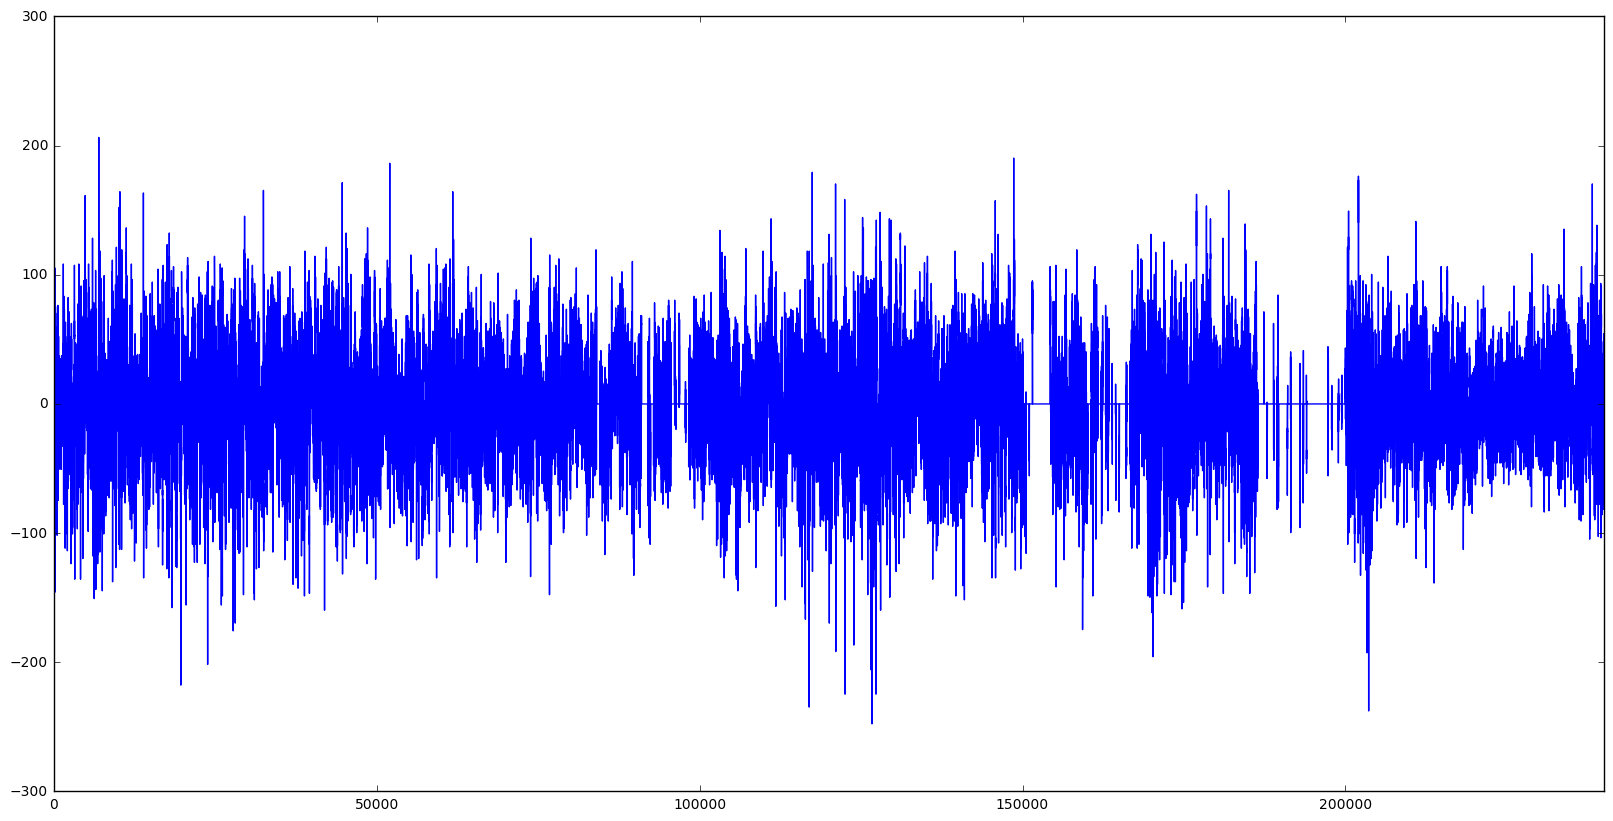

In [18]:
df2[0].plot(figsize=(20,10)).set_ylim([-300, 300])

                  0              1              2              3   \
count  240000.000000  240000.000000  240000.000000  240000.000000   
mean       -0.000154       0.056828       0.093768      -0.022474   
std        28.501362      28.203222      27.311695      34.989128   
min      -263.421326    -183.996109    -167.400574    -334.151367   
25%       -17.421328     -16.996117     -17.400579     -20.151382   
50%         0.578672       1.003883      -0.400579      -0.151382   
75%        17.578672      18.003883      17.599421      20.848618   
max       220.578674     169.003891     174.599426     248.848618   

                  4              5              6              7   \
count  240000.000000  240000.000000  240000.000000  240000.000000   
mean        0.076965      -0.066250      -0.031775      -0.147011   
std        26.226006      19.372616      23.577341      16.469179   
min      -549.673096    -138.053879    -255.044525    -210.432861   
25%       -15.673080     -13.0538

C:\Users\JesusLaborin\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


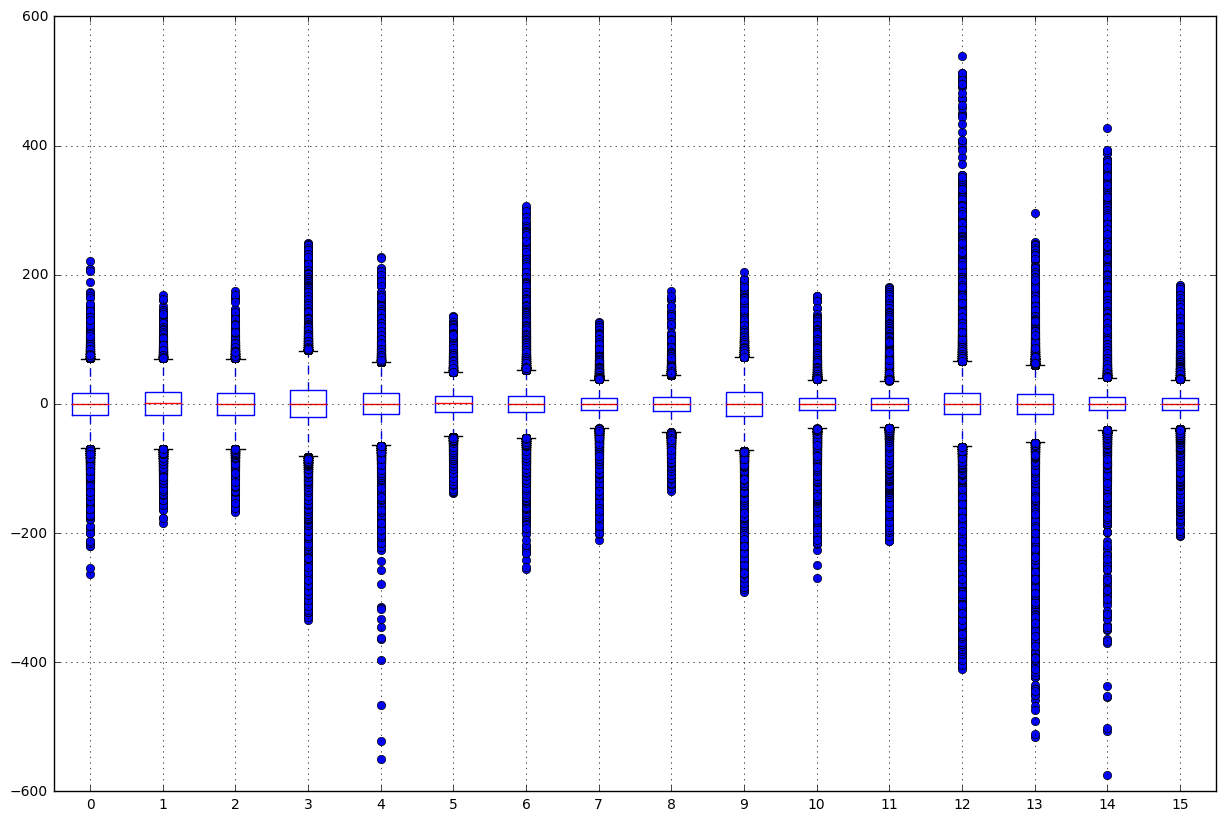

In [29]:
df_prime = df
print(df_prime.describe(), '\n')
fig = plt.figure(1, figsize=(15, 10))
df_prime.boxplot(sym = 'ko', whis = 1.5)
plt.show()

                  0              1              2              3   \
count  240000.000000  240000.000000  240000.000000  240000.000000   
mean        0.000054      -0.004404       0.089710      -0.107295   
std        36.242836      37.246490      40.387531      63.513748   
min      -247.669815    -201.135818    -257.547638    -433.000000   
25%       -19.669817     -21.135822     -21.547646     -31.379080   
50%         0.000000       0.000000       0.000000       0.000000   
75%        21.330183      22.864178      23.452354      36.620922   
max       206.330185     215.864182     216.452362     433.620911   

                  4              5              6              7   \
count  240000.000000  240000.000000  240000.000000  240000.000000   
mean        0.049200      -0.140488       0.003412      -0.231282   
std        41.530769      34.676418      59.469124      33.674580   
min     -1827.435425    -441.874359    -361.000458    -217.249176   
25%       -20.435467     -18.8743

C:\Users\JesusLaborin\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


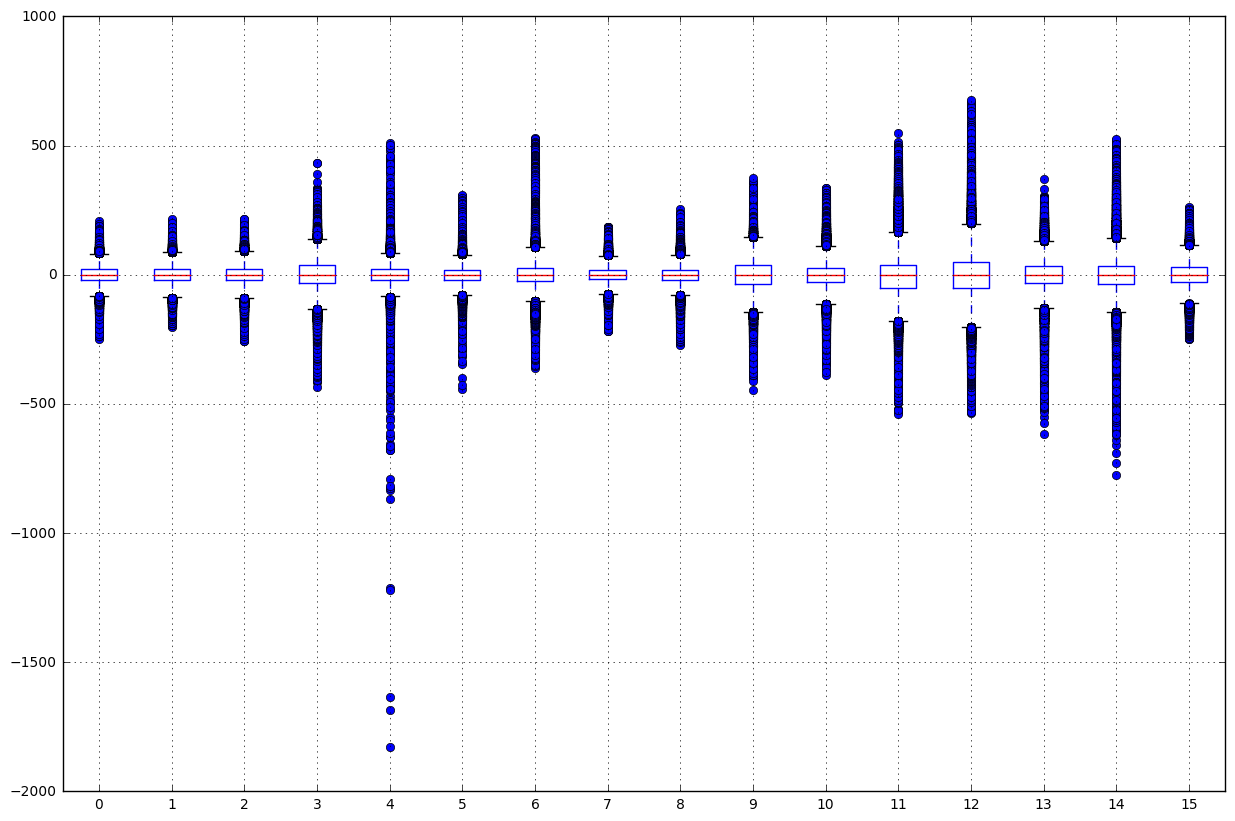

In [20]:
df2_prime = df2
print(df2_prime.describe(), '\n')
fig = plt.figure(1, figsize=(15, 10))
df2_prime.boxplot(sym = 'ko', whis = 1.5)
plt.show()

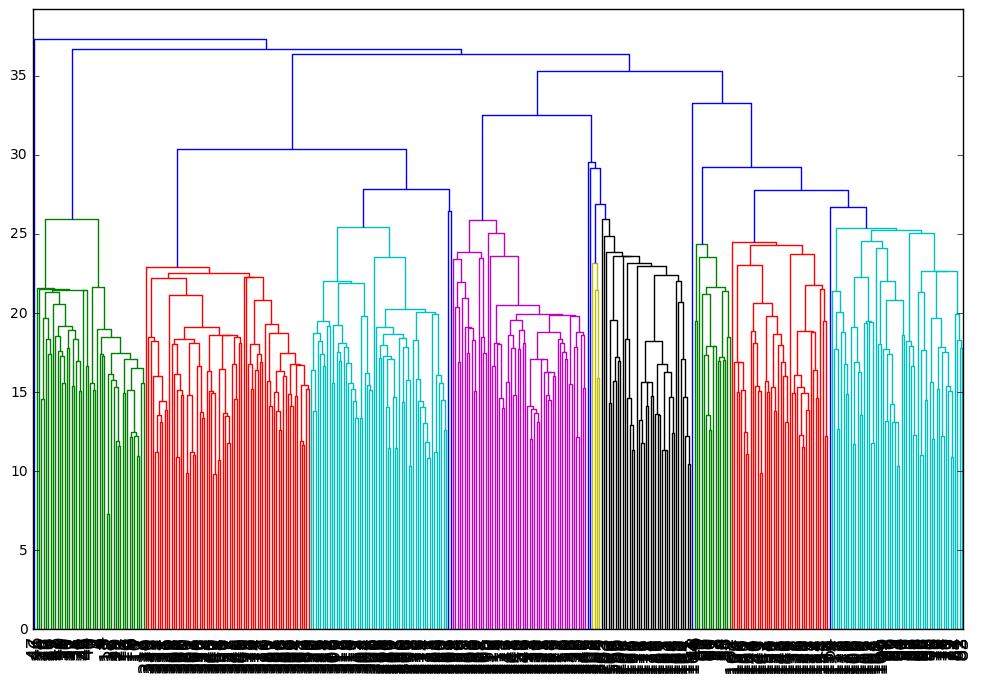

In [21]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

Z = linkage(df.head(400), 'single')
plt.figure(figsize=(12, 8))
#dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True,leaf_font_size=14)
dendrogram(Z,leaf_font_size=14)
plt.show()

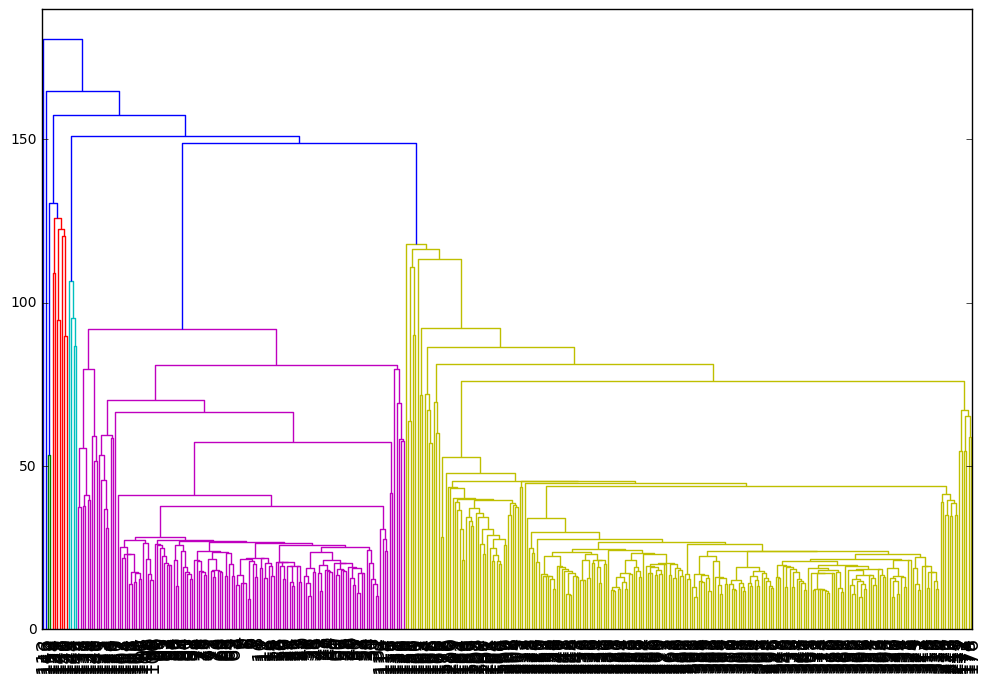

In [22]:
Z = linkage(df2.head(400), 'single')
plt.figure(figsize=(12, 8))
#dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True,leaf_font_size=14)
dendrogram(Z,leaf_font_size=14)
plt.show()

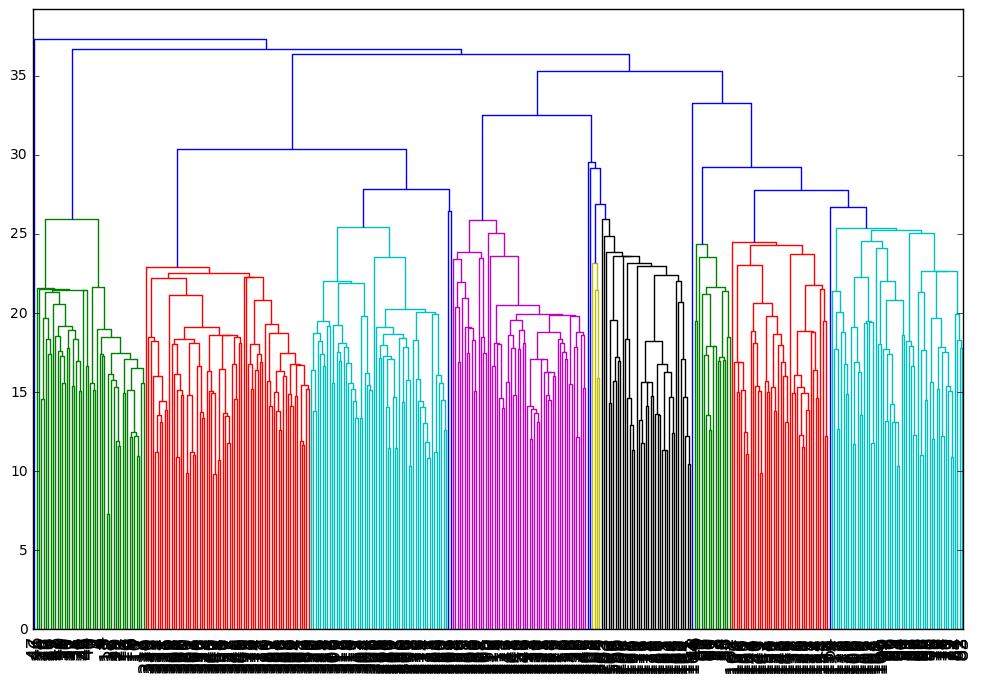

In [30]:
test = mat_to_data('train_1/1_22_1.mat')
dftest = pd.DataFrame(data=feat['data'])
Z = linkage(dftest.head(400), 'single')
plt.figure(figsize=(12, 8))
#dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True,leaf_font_size=14)
dendrogram(Z,leaf_font_size=14)
plt.show()

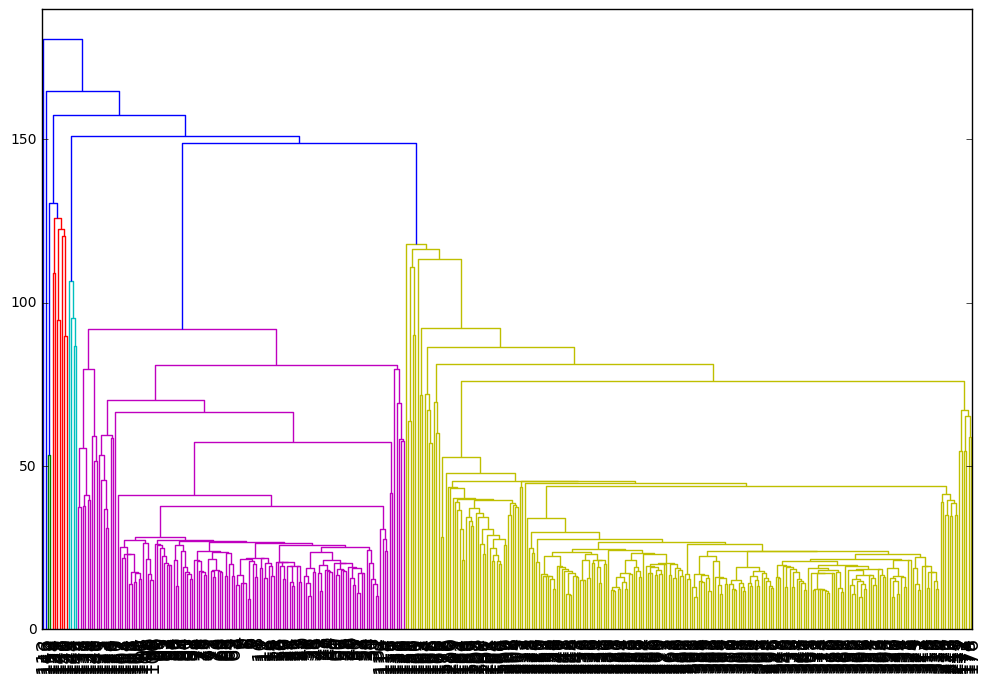

In [31]:
test2 = mat_to_data('train_1/1_23_0.mat')
dftest2 = pd.DataFrame(data=feat2['data'])
Z = linkage(dftest2.head(400), 'single')
plt.figure(figsize=(12, 8))
#dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True,leaf_font_size=14)
dendrogram(Z,leaf_font_size=14)
plt.show()

In [33]:
LARGER_DISTANCE = sys.maxsize
TALK = True # TALK = True, imprime resultados parciales
NUM_CLUSTERS = 6
SAMPLING_METHOD = 1 
centroids = []
data = []
DATA_SET = feat['data']
DATA_LEN = int(len(DATA_SET)/600)
# Definir una clase para expresar puntos y su asignación a un cluster
class DataPoint:
    def __init__(self, p):
        self.value = p[:]
        
    def set_value(self, p):
        self.value = p
    
    def get_value(self):
        return self.value
    
    def set_cluster(self, cluster):
        self.cluster = cluster
    
    def get_cluster(self):
        return self.cluster


def initialize_dataset():
    for i in range(DATA_LEN):
        point = DataPoint(DATA_SET[i])
        point.set_cluster(None)
        data.append(point)
    return

def initialize_centroids():
    if (TALK) : 
        print("Centroides inicializados en:")
    for c in range(NUM_CLUSTERS):
        if (SAMPLING_METHOD == 0) :
            which = random.randint(0,DATA_LEN-1)
        elif (SAMPLING_METHOD == 1):
            which = c
        else :
            which = DATA_LEN-1 - c
                
        centroids.append(list(DATA_SET[which]))
        if (TALK) : 
            print(centroids[c])        
    if (TALK) : 
        print()
    
    return

def update_clusters():
    changed = False
    
    for i in range(DATA_LEN):
        minDistance = LARGER_DISTANCE
        currentCluster = 0
        
        for j in range(NUM_CLUSTERS):
            dist = distance.euclidean(data[i].get_value(), centroids[j])
            if(dist < minDistance):
                minDistance = dist
                currentCluster = j
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            changed = True
            
    members = [0] * NUM_CLUSTERS
    for i in range(DATA_LEN):
        members[data[i].get_cluster()] += 1
    
    if (TALK) : 
        for j in range(NUM_CLUSTERS):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
            
    return changed

def update_centroids():    
    if (TALK) : 
        print("Los nuevos centroids son:")
    for j in range(NUM_CLUSTERS):
        means = [0] * DATA_SET.shape[1]
            
        clusterSize = 0
        for k in range(len(data)):
            if(data[k].get_cluster() == j):
                p = data[k].get_value()
                for i in range(DATA_SET.shape[1]):
                    means[i] += p[i]
                clusterSize += 1

        if(clusterSize > 0):
            for i in range(DATA_SET.shape[1]):
                centroids[j][i] = means[i] / clusterSize

        if (TALK) : 
            print(centroids[j])        
    if (TALK) : 
        print()
    
    return

initialize_dataset()
initialize_centroids()
KEEP_WALKING = update_clusters()
update_centroids()    

Centroides inicializados en:
[12.578672, 2.0038834, 13.599422, -41.151382, 26.32692, -2.053879, 8.9554749, -9.4328651, -15.487409, -6.0730081, 12.813484, 9.9572573, -20.265879, 19.871618, -5.7014041, -11.593888]
[16.578672, 9.0038834, 6.599421, -40.151382, 25.32692, -0.053879015, 11.955475, -9.4328651, -19.487408, -9.0730076, 17.813484, 10.957257, -21.265879, 16.871618, -11.701405, -7.5938883]
[9.5786724, 16.003883, 9.5994215, -41.151382, 27.32692, -1.053879, 17.955475, -8.4328651, -19.487408, -7.0730081, 17.813484, 12.957257, -28.265879, 12.871618, -9.7014046, -8.5938883]
[-7.4213276, 21.003883, 10.599422, -38.151382, 31.32692, -1.053879, 14.955475, -6.4328651, -18.487408, 0.92699212, 15.813484, 12.957257, -33.265881, 10.871618, -8.7014046, -4.5938883]
[-18.421328, 25.003883, 12.599422, -36.151382, 38.32692, 0.94612098, 12.955475, -13.432865, -14.487409, 2.9269922, 16.813484, 16.957258, -37.265881, 4.8716183, -4.7014041, -2.5938885]
[-28.421328, 18.003883, 15.599422, -36.151382, 37.32

In [34]:
while(KEEP_WALKING):
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        if (TALK) : 
            print ("No más cambios.")

El cluster  0  incluye  99 miembros.
El cluster  1  incluye  126 miembros.
El cluster  2  incluye  30 miembros.
El cluster  3  incluye  59 miembros.
El cluster  4  incluye  34 miembros.
El cluster  5  incluye  52 miembros.

Los nuevos centroids son:
[10.215035871122822, 0.83216619276150006, -2.3096697378640223, -15.282695155553144, -0.23873702474314756, -5.2761010736076521, 4.5716363756795122, 4.9913772714860514, 8.8156221511990136, 1.1795174328967779, 1.944797320799394, -6.1033485423434861, 7.5826059257743337, -4.1384829758393646, -3.1256467700004578, -3.2504539977420461]
[27.880259211810809, 17.075311934763921, -15.781531106858026, -10.302175515227848, 5.9380306549488555, 3.311200529987377, 0.31261755177189432, 0.14649992140512619, 0.8697345781893957, -26.771420887538365, -2.0039761272214709, -1.4157582592396509, 1.0277717664601311, 5.5462214355430905, -0.41569010747803581, -4.5145232824106065]
[17.512005201975505, 26.837216695149738, 16.366087738672892, 5.3486184696356451, -8.173080

In [36]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=6, init='random')
k_means.fit(df.head(400)) 

print(k_means.cluster_centers_)

[[ -4.34  21.18 -21.44  -2.15  35.83  11.65   1.87  -1.55   2.89 -26.83
   -8.22   0.56 -14.2    3.98   8.68  -6.71]
 [  7.92   7.66  -8.59 -15.51  -5.93  -3.98   2.83   2.5    8.73 -11.11
    7.46  -1.81   4.67   9.78  -2.05  -2.19]
 [ 23.06  18.02   7.95   0.94   0.15  -1.72  11.76  10.67  -4.91 -12.91
  -13.84  -9.91   6.91 -21.36  -7.75  -6.71]
 [ -9.9    7.5   -7.21 -20.38  28.72  -2.26   1.54  -3.95 -16.32  12.34
    7.5    4.98  -1.45  -4.82   3.8   -0.22]
 [ 48.    14.31 -24.93 -23.1   17.1   10.89 -13.18 -11.43   7.68 -29.38
   -1.3    1.29  -3.32   5.76   8.08  -4.51]
 [  5.23  36.6  -10.67 -20.99 -15.73 -32.2   -4.55  15.29  21.77  23.93
    8.36  -6.61 -17.3    5.94   1.35 -10.9 ]]


El algoritmo Isodata utiliza los siguientes parámetros:
- $k_{init}$: Número inicial de clusters.
- $k$: el número actual de clusters
- $n_{min}$: Mínimo número de elementos en un cluster.
- $I_{max}$: Máximo número de iteraciones.
- $\sigma_{max}$: Máximo valor de la desviación estándar de los puntos al centro de su cluster, a lo largo de cada eje.
- $L_{min}$: Distancia mínima entre los centroides de las clases.
- $P_{max}$: Número máximo de clusters que pueden ser unificados en una iteración.

* Definir los valores de $k_{init}, n_{min}, I_{max}, \sigma_{max}, L_{min}$ y $P_{max}$:
* Seleccionar arbitrariamente los centroides iniciales
* Asignar cada punto del conjunto de datos al cluster donde la distancia del punto al centroide es menor.
* Eliminar los clusters con menos de $n_{min}$ elementos. Ajustar el valor de $k$ y reetiquetar los clusters.
* Recalcular los centroides a partir de los puntos actualmente en cada cluster. Si se eliminaron clusters en el paso 4) el algoritmo regresa la paso 3).
* Calcular las distancias promedio $\Delta_j$ de los puntos de un cluster a su centroide y la distancia promedio general $\Delta$.
* Si esta es la última iteración, terminar. En caso contrario verificar si quedan la mitad o menos de los clusters iniciales y de ser así ir al paso 8 (dividir clusters). En caso contrario, si la iteración es par o el número de clusters es mayor que el doble de los clusters iniciales, entonces ir al paso 9 (unir). En caso contrario, volver al paso 3 (como $k$-means).


In [41]:
K_INIT = 6
N_MIN = 3
I_MAX = 10
S_MAX = 5
L_MIN = 80
P_MAX = 2

num_clusters = 6 # valor de k
iteration = 0

# Definir forma de muestreo; 0 = random, 1=head, 2=tail
SAMPLING_METHOD = 1 

centroids = []
def initialize_centroids():
    if (TALK) : 
        print("Centroides inicializados en:")
    for c in range(num_clusters):
        if (SAMPLING_METHOD == 0) :
            which = random.randint(0,DATA_LEN-1)
        elif (SAMPLING_METHOD == 1):
            which = c
        else :
            which = DATA_LEN-1 - c
                
        centroids.append(list(DATA_SET[which]))
        if (TALK) : 
            print(centroids[c])        
    if (TALK) : 
        print()
    
    return

elim = 0
members = []
def update_clusters():
    global num_clusters, elim, members
    changed = False
    
    if (TALK) :
        print("Actualizando clusters")
    for i in range(DATA_LEN):
        minDistance = LARGER_DISTANCE
        currentCluster = 0
        
        for j in range(num_clusters):
            dist = distance.euclidean(data[i].get_value(), centroids[j])
            if(dist < minDistance):
                minDistance = dist
                currentCluster = j
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            changed = True
            
    members = [0] * num_clusters
    for i in range(DATA_LEN):
        members[data[i].get_cluster()] += 1
    
    if (TALK) : 
        for j in range(num_clusters):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
        
    elim = 0
    for j in range(num_clusters):
        if (members[j] < N_MIN):
            if (TALK) :
                print("Eliminando cluster ", j)
            for i in range(DATA_LEN):
                cluster = data[i].get_cluster()
                if (cluster == j-elim) :
                    data[i].set_cluster(None)
                elif (cluster != None and cluster > j-elim) :
                    data[i].set_cluster(cluster-1)
            elim += 1
            members[j] = 0
    
    if (TALK and elim > 0) : 
        for j in range(num_clusters):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
    num_clusters -= elim

    return changed

def update_centroids():
    global centroids
    centroids = []

    if (TALK) : 
        print("Los nuevos centroids son:")
    for j in range(num_clusters):
        means = [0] * DATA_SET.shape[1]
            
        clusterSize = 0
        for k in range(len(data)):
            if(data[k].get_cluster() == j):
                p = data[k].get_value()
                for i in range(DATA_SET.shape[1]):
                    means[i] += p[i]
                clusterSize += 1

        if(clusterSize > 0):
            for i in range(DATA_SET.shape[1]):
                means[i] = means[i] / clusterSize
            centroids.append(means)

        if (TALK) : 
            print(centroids[j])        
    if (TALK) : 
        print()
    
    return

  
deltas = []
delta = 0
def update_deltas():
    global deltas, delta
    deltas = [0] * num_clusters
    delta = 0
    
    for i in range(DATA_LEN):
        cluster = data[i].get_cluster()
        deltas[cluster] += distance.euclidean(data[i].get_value(), centroids[cluster])
    mem = 0
    for i in range(num_clusters):
        delta += deltas[i]
        mem += members[i]
        deltas[i] /= members[i]
        if (TALK) : 
            print("Distancia promedio en el cluster {}:".format(i), deltas[i])        
    delta /= mem
    if (TALK) : 
        print("Distancia promedio global: {}\n".format(delta))
    
    return

def divide_clusters():
    global num_clusters
    # Cálculo de desviaciones estandar
    sigma_vect = [[0] * DATA_SET.shape[1]] * num_clusters
    for d in range(DATA_LEN):
        cluster = data[d].get_cluster()
        p = data[d].get_value()
        for i in range(DATA_SET.shape[1]):
            sigma_vect[cluster][i] += (p[i] - centroids[cluster][i])**2        
    candidates = []
    for cluster in range(num_clusters):
        for i in range(DATA_SET.shape[1]):
            sigma_vect[cluster][i] = math.sqrt(sigma_vect[cluster][i]) / members[cluster]
            if (sigma_vect[cluster][i] > S_MAX):
                candidates.append(cluster)
                break # Sucio... pero eficiente :-)
    
    divided = False
    for cluster in candidates:
        cond = num_clusters < K_INIT/2 or (deltas[cluster] > delta and members[cluster] > N_MIN)
        if(cond) :
            centroids.pop(cluster)
            points = []
            for d in range(DATA_LEN):
                if (data[d].get_cluster() == cluster):
                    points.append(data[d].get_value())
            dist = distance.squareform(distance.pdist(points, 'euclidean'))
            idx = (dist==dist.max()).argmax()
            z1 = list(points[idx // len(points)])
            z2 = list(points[idx % len(points)])
            if (TALK) :
                print("Se dividirá el cluster {}.\nSe crearán nuevos clusters en {} y {}.\n"
                     .format(cluster, z1, z2))
            centroids.append(z1)
            centroids.append(z2)
            num_clusters += 1
            divided = True

    if (divided) :
        update_clusters()
        update_centroids()
    
    return 

def mix_clusters():
    global centroids, num_clusters
    dist = distance.squareform(distance.pdist(centroids, 'euclidean'))
    flag = math.floor(dist.max() * 10)
    dist[dist == 0] = flag
    
    mixed = False
    while (dist.min() < flag):
        idx = (dist==dist.min()).argmax()
        z1 = idx // len(centroids)
        z2 = idx % len(centroids)
        
        if (dist.min() < L_MIN):
            dist[z1] = flag
            dist[:,z1] = flag
            dist[z2] = flag
            dist[:,z2] = flag
            z = [sum(x)/2 for x in zip(centroids[z1], centroids[z2])]
            centroids[z1] = z
            centroids[z2] = [LARGER_DISTANCE]*DATA_SET.shape[1]
            num_clusters -= 1

            mixed = True
            if(TALK):
                print("Unificando clusters {} y {}\nSe creará nuevo centroide en {}\n"
                      .format(z1, z2, z))
        else :
            dist[z1][z2] = flag
            dist[z2][z1] = flag
        
    if (mixed) :
        update_clusters()
        update_centroids()

    return

In [42]:
initialize_centroids()
KEEP_WALKING = update_clusters()
update_centroids()
if (elim > 0) :
    KEEP_WALKING = update_clusters()
    update_centroids()    
update_deltas()
divide_clusters()
mix_clusters()

iteration +=1
while(iteration < I_MAX and KEEP_WALKING) :
    if (num_clusters <= K_INIT / 2) :
        divide_clusters()
    elif (iteration % 2 == 0 or num_clusters > 2 * K_INIT) :
        mix_clusters()
        
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        if (TALK) : 
            print ("No más cambios.")
    iteration += 1

Centroides inicializados en:
[12.578672, 2.0038834, 13.599422, -41.151382, 26.32692, -2.053879, 8.9554749, -9.4328651, -15.487409, -6.0730081, 12.813484, 9.9572573, -20.265879, 19.871618, -5.7014041, -11.593888]
[16.578672, 9.0038834, 6.599421, -40.151382, 25.32692, -0.053879015, 11.955475, -9.4328651, -19.487408, -9.0730076, 17.813484, 10.957257, -21.265879, 16.871618, -11.701405, -7.5938883]
[9.5786724, 16.003883, 9.5994215, -41.151382, 27.32692, -1.053879, 17.955475, -8.4328651, -19.487408, -7.0730081, 17.813484, 12.957257, -28.265879, 12.871618, -9.7014046, -8.5938883]
[-7.4213276, 21.003883, 10.599422, -38.151382, 31.32692, -1.053879, 14.955475, -6.4328651, -18.487408, 0.92699212, 15.813484, 12.957257, -33.265881, 10.871618, -8.7014046, -4.5938883]
[-18.421328, 25.003883, 12.599422, -36.151382, 38.32692, 0.94612098, 12.955475, -13.432865, -14.487409, 2.9269922, 16.813484, 16.957258, -37.265881, 4.8716183, -4.7014041, -2.5938885]
[-28.421328, 18.003883, 15.599422, -36.151382, 37.32

ZeroDivisionError: float division by zero

In [45]:
num_clusters = 6
k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
train_set = feat['data']
test_set = feat2['data']
test_point = test_set[0]
k_means.fit(train_set) 
print("Prototipos de clase (centroides):\n", k_means.cluster_centers_)

KeyboardInterrupt: 

In [40]:
LARGER_DISTANCE = sys.maxsize

k_neighs = 5 # 5 vecinos... aunque tomaremos sólo el más cercano
neighbors_dists = [LARGER_DISTANCE] * k_neighs
neighbors = [0] * k_neighs
for i in range(len(train_set)):
    dist = distance.euclidean(train_set[i], test_point)
    for k in range(k_neighs):
        if (dist < neighbors_dists[k]) :
            for j in range(k_neighs-1, k, -1):
                neighbors_dists[j] = neighbors_dists[j-1]
                neighbors[j] = neighbors[j-1] 
            neighbors_dists[k] = dist
            neighbors[k] = i
            break
            
print("Los {} vecinos más próximos son:".format(k_neighs))
for k in range(k_neighs):
    clase = k_means.labels_[neighbors[k]]
    print("Vecino {}: {}, dist={}, clase={}, centroide={}"
          .format(k, neighbors[k], neighbors_dists[k], 
                  clase, k_means.cluster_centers_[clase]))
print("\nEl nuevo punto es asignado a la clase", k_means.labels_[neighbors[0]])

simple_vote = [0] * num_clusters
winner = 0 
for k in range(k_neighs):
    clase = k_means.labels_[neighbors[k]]
    simple_vote[clase] += 1
for k in range(num_clusters):
    if (simple_vote[k] == max(simple_vote)):
        winner = k
print("Votación simple:\nEl nuevo punto es asignado a la clase {} con {} vecinos cercanos.\n"
      .format(winner, simple_vote[winner]))

print("Los {} vecinos más próximos y sus pesos ponderados son:".format(k_neighs))
suma_dists = sum(neighbors_dists)
neighbors_weights = [0] * k_neighs
weighted_vote = [0] * num_clusters
winner = 0 
for k in range(k_neighs):
    neighbors_weights[k] = 1 - neighbors_dists[k] / suma_dists
    clase = k_means.labels_[neighbors[k]]
    weighted_vote[clase] += neighbors_weights[k]
    print("Vecino {}: peso={}, clase: {}"
          .format(k, neighbors_weights[k], k_means.labels_[neighbors[k]]))
for k in range(num_clusters):
    if (simple_vote[k] == max(simple_vote)):
        winner = k
print("\nVotación ponderada:")
print("El nuevo punto es asignado a la clase {} con una votación de {}."
      .format(winner, weighted_vote[winner]))

Los 5 vecinos más próximos son:
Vecino 0: 93913, dist=52.6953239440918, clase=1, centroide=[  2.19   5.03   7.27  12.56   2.17   2.48   5.59   0.29  -0.35  -0.74
   1.54 -20.72 -11.67  -5.83  -3.28   3.73]
Vecino 1: 80606, dist=54.83095932006836, clase=1, centroide=[  2.19   5.03   7.27  12.56   2.17   2.48   5.59   0.29  -0.35  -0.74
   1.54 -20.72 -11.67  -5.83  -3.28   3.73]
Vecino 2: 80607, dist=54.90961456298828, clase=1, centroide=[  2.19   5.03   7.27  12.56   2.17   2.48   5.59   0.29  -0.35  -0.74
   1.54 -20.72 -11.67  -5.83  -3.28   3.73]
Vecino 3: 93911, dist=55.308692932128906, clase=1, centroide=[  2.19   5.03   7.27  12.56   2.17   2.48   5.59   0.29  -0.35  -0.74
   1.54 -20.72 -11.67  -5.83  -3.28   3.73]
Vecino 4: 93912, dist=56.68440628051758, clase=1, centroide=[  2.19   5.03   7.27  12.56   2.17   2.48   5.59   0.29  -0.35  -0.74
   1.54 -20.72 -11.67  -5.83  -3.28   3.73]

El nuevo punto es asignado a la clase 1
Votación simple:
El nuevo punto es asignado a la cla